In [1]:
import everest
import numpy as np
import matplotlib.pyplot as pl
from plotmatrix import PlotMatrix
%matplotlib inline

## Load the light curve
Choose from 201367065 205071984, 201546283, 210957318, 211916756, 201546283

In [2]:
star = everest.Everest(201367065)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 201367065.


## Plot the raw light curve

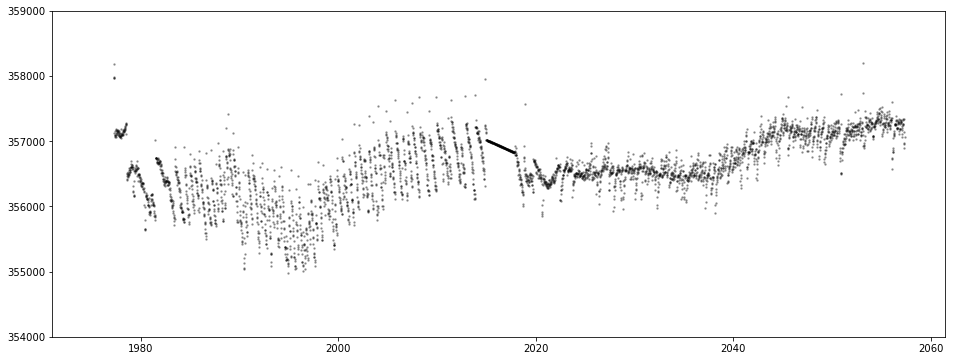

In [16]:
fig = pl.figure(figsize=(16,6))
pl.plot(star.time, star.fraw, 'k.', alpha = 0.3, ms = 3);
pl.ylim(354000,359000);

## Remove the really bad outliers

In [4]:
cut = np.where(star.fraw < 355000)
time = np.delete(star.time, cut)
fpix = np.delete(star.fpix, cut, axis = 0)
ntime, npix = fpix.shape

## Plot the pixel-level light curve

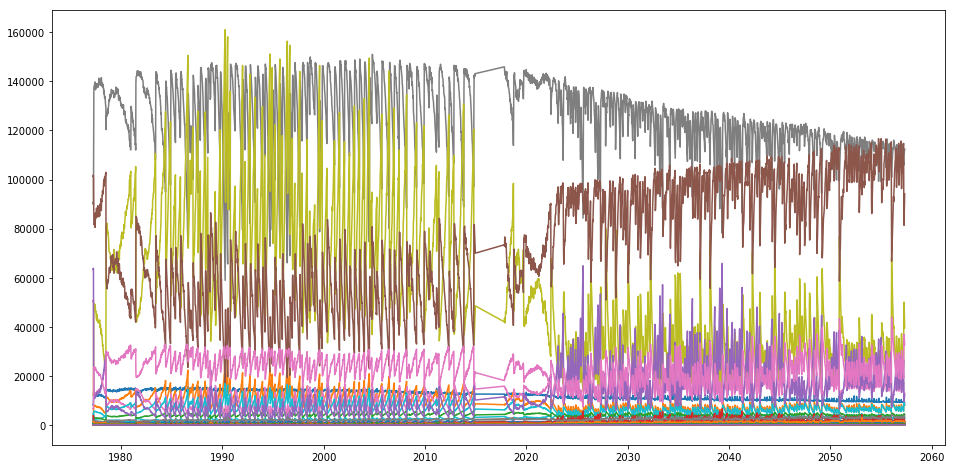

In [23]:
fig = pl.figure(figsize=(16,8))
for n in range(npix):
  pl.plot(time, fpix[:,n]);

## Compute the total flux

In [6]:
total_flux = np.sum(fpix, axis = 1).reshape(-1, 1)

## The PLD design matrix

In [7]:
X = fpix / total_flux.reshape(-1, 1)

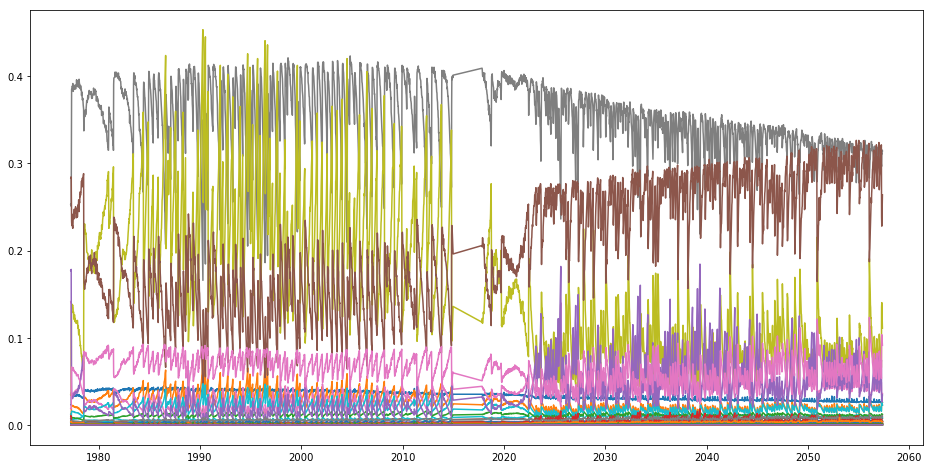

In [24]:
fig = pl.figure(figsize=(16,8))
for n in range(npix):
  pl.plot(time, X[:,n]);

## The linear algebra

In [9]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, total_flux))
model = np.dot(X, w)
detrended_flux = total_flux - model
detrended_flux += np.nanmedian(total_flux)

## Plot!

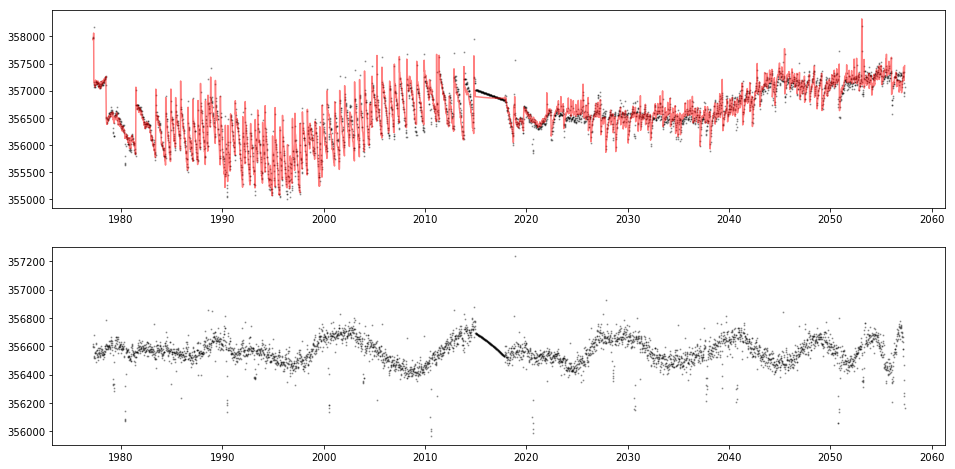

In [22]:
fig, ax = pl.subplots(2, figsize = (16,8))
ax[0].plot(time, total_flux, 'k.', alpha = 0.3, ms = 2);
ax[0].plot(time, model, 'r-', alpha = 0.5);
ax[1].plot(time, detrended_flux, 'k.', alpha = 0.3, ms = 2);

## Inspect the matrices

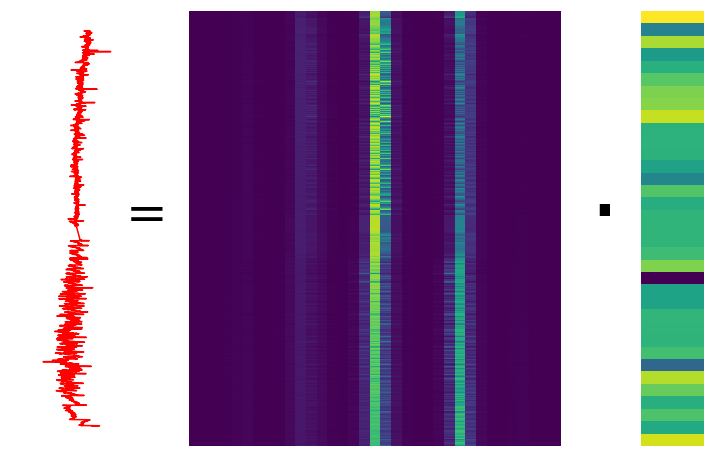

In [11]:
PlotMatrix(model,w,X)

## Take 2: Add polynomial regressors

In [12]:
X = np.hstack((X, np.array([np.linspace(0, 1, ntime) ** n for n in range(50)]).T))

In [13]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, total_flux))
model = np.dot(X, w)
detrended_flux = total_flux - model
detrended_flux += np.nanmedian(total_flux)

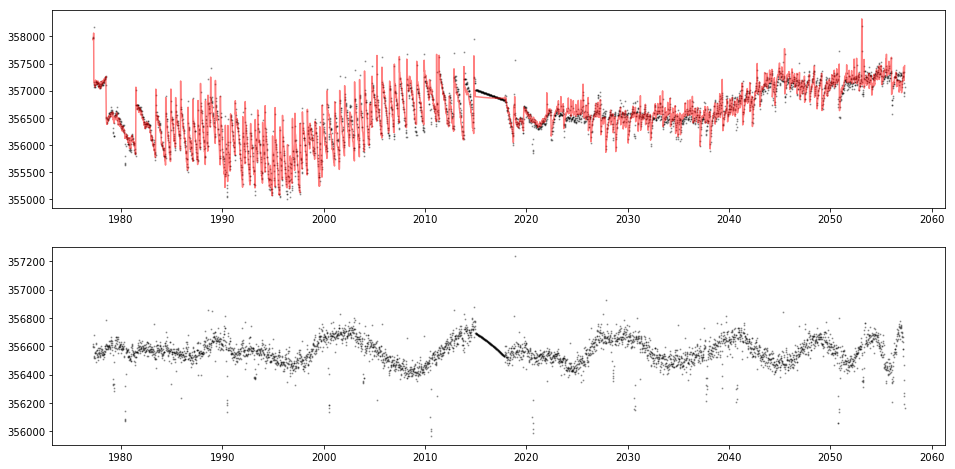

In [25]:
fig, ax = pl.subplots(2, figsize = (16,8))
ax[0].plot(time, total_flux, 'k.', alpha = 0.3, ms = 2);
ax[0].plot(time, model, 'r-', alpha = 0.5);
ax[1].plot(time, detrended_flux, 'k.', alpha = 0.3, ms = 2);

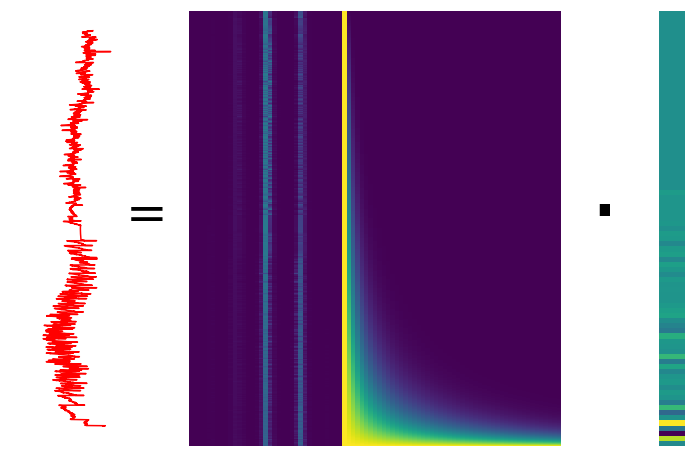

In [21]:
PlotMatrix(model, w, X)